<a href="https://colab.research.google.com/github/Cidowu/Chukwudees_Portfolio/blob/main/BITCOIN_PRICE_PREDICTION_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Machine Learning [AR & ARIMA models] to Forecast Bitcoin Prices in Real Time**



###  **Author: Chukwudi Idowu**


### **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

> Given the current situation of unprecedented crashing prices of cryptocurrencies in the cryto market, most notably Bitcoin's crash from over 47,000 Dollars on 2022-01-01, to a one year low of just over 19,000 Dollars on 2022-06-18. This price crash signifies a 60% slump in just over 6 months.

> In this project, I try to predict the price of Bitcoin by making use of data from yahoo finance. This data was obtained with the help of the yahoo finance API. The model was trained to predict the price of Bitcon with data from 2020-01-01 rill date. 

> Next, 2 models, AR and ARIMA models were trained and one was selected based on two criteria. The MAE and the RMSE of the models was used as criteria for perfomance of each model. The AR model was selected based on these critera and used for predictions and forecasts. 

> Finally, I tried to forecast the Bitcoin price for the next 3 months with the model

### **Project Description** 

>  There 3 major stages in this project
<ol>
<li><a href="#Preparation stage">Preparation Stage</a></li>
<li><a href="#Model Building">Model Building</a></li>
<li><a href="#Model evaluation & Forecast Results">Model evaluation & Forecast Results</a></li>
</ol>


<a id='Preparation stage'></a>
## **Preparation stage**

> The preparation stage is further broken down into the following processes

<ul>
<li> Package installation</li>
<li> Library importation
<li> Data importation and Data wrangling</li>
<li> Stationarity</li>
<li> Train-Test split</li>
</ul>

###   **Package installion**

In [ ]:
pip install yfinance


In [ ]:
pip install pmdarima

In [ ]:
pip install statsmodels

###   **Library importation**

In [ ]:
#Import libraries

import yfinance as yf
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns
import statsmodels.api as sm
import pmdarima
import time


from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings("ignore")

### **Data Importation & Data Wrangling**

> In this section, the yfinance API was used to connect to the yahoo finance database from where the required data was downloaded.



In [ ]:
#Connect to the yfinance API and import data

df =yf.download("BTC-USD")


[*********************100%***********************]  1 of 1 completed


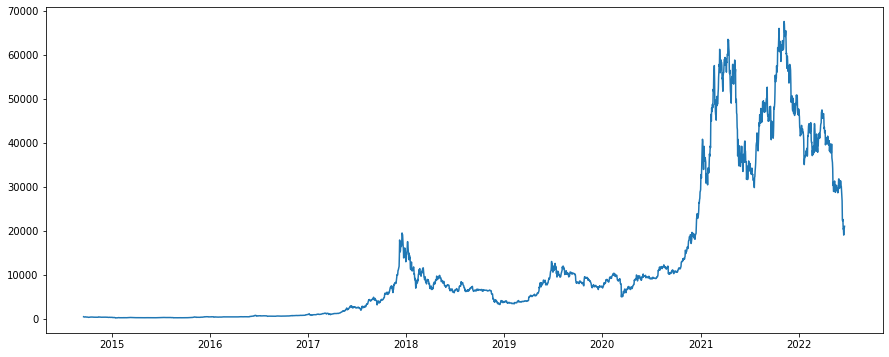

In [ ]:
#visualize the field of interest "Adj Close"

fig, ax = plt.subplots(figsize=(15,6))
plt.plot(df.index, df["Adj Close"])
plt.show()

**Data wrangling**

> This involved selecting the appropriate field, "Adj Closing" from which the time series was created


In [ ]:
#Select data from "2020-01-01" till date

df = df[df.index >= "2020-01-01"]

In [ ]:
#Create a series

ts_btc = df["Adj Close"]
ts_btc.head

<bound method NDFrame.head of Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2022-06-17    20471.482422
2022-06-18    19017.642578
2022-06-19    20553.271484
2022-06-20    20599.537109
2022-06-21    21011.861328
Name: Adj Close, Length: 903, dtype: float64>

### **Data Exploration**

>The exploration of the time series data is an important process to check for trends and seasonality in the data. If the data is observed to have trend, seasonality or both, then the time series will be stationarized. 

> The decomposition of the time series data showed trends, and therefore required stationarization

In [ ]:
#Visualize the Trend, seasonality and residual plots
decom = sm.tsa.seasonal_decompose(ts_btc, model="additive")

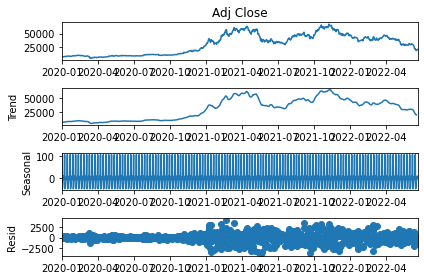

In [ ]:
#Plot the decomposition of the series

decom.plot()
plt.show()

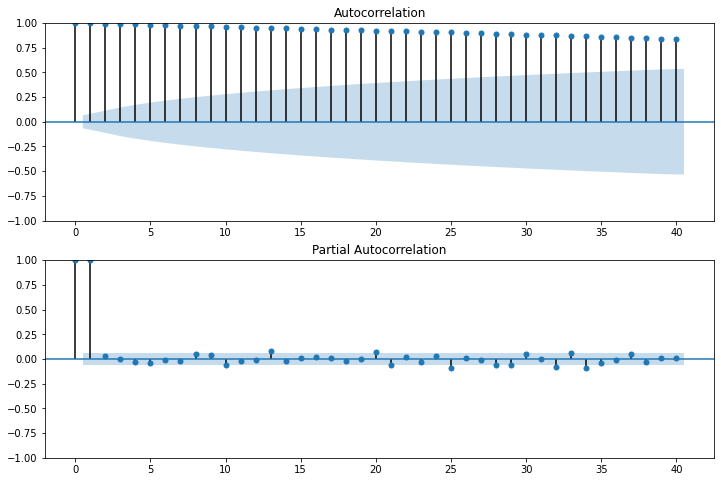

In [ ]:
#Visualize the ACF and PACF plots

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_btc, lags = 40, ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_btc, lags= 40, ax = ax2);

### **Stationarity** 

> A stationary time series is one whose time series do not depend on time.

> To make the time series stationary, the following steps were carried out.


*   **Dickey Fuller test**: The results of this procedure is based on a test of hypothesis. If the p-value > 0.05, then the series is not stationary. If the p-value < 0.05, then the time series is stationary.

*   **Differencing**: Since the results from the Dickey Fuller test showed a p-value > 0.05, the time series was stationarized with the aid of the differencing method.



In [ ]:
adtest = adfuller(ts_btc)
print(f"p-value of adfuller test is: {adtest[1]}")

p-value of adfuller test is: 0.5637358304382912


👆 the Dickey Fuller test returned a p-value of 0.57

**Differencing**

> Here I applied the differencing method to stationarize the series

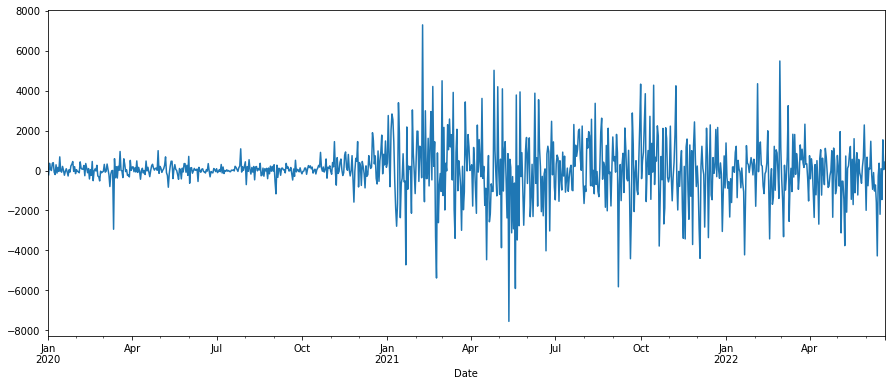

In [ ]:
#Use the Difference method to stationarize the time series

ts1 = ts_btc - ts_btc.shift(1)

#Visualize the residual plot of the differenced series to confirm stationarity
ts1.plot(figsize=(15, 6));

In [ ]:
#stationarize the data and confirm stationarity with the Dick Fuller test
 
adtest = adfuller(ts1.dropna())
print(f"p-value of adfuller test is: {adtest[1]}")

p-value of adfuller test is: 0.0


👆 the Dickey Fuller test returned a p-value of 0.0 😇

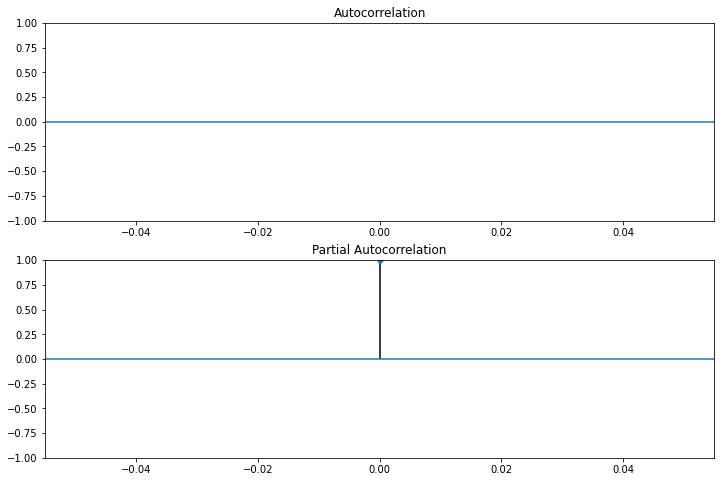

In [ ]:
#Plot ACF and PACF to visualize stationarity

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1, lags = 40, ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1, lags= 40, ax = ax2)

### **Train-Test split**

> Following the stationarizatio of the time series, the data is split into train, and test datasets, with a ratio of 80/20. 80% for training data, and 20% for the test data.

In [ ]:
#Split the data to train and test sets

cutoff_test = int(len(ts_btc.dropna()) * 0.80) 
train = ts_btc.iloc[:cutoff_test]
test = ts_btc.iloc[cutoff_test:]

print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (722,)
test shape:  (181,)


<a id='Model Building'></a>
##  **Model Building**

> In this stage, both the AR and ARIMA models were trained with the training data, and the MAE and RMSE were calculated as performance criteria.

> The following procedures were carried out

<ul>
<li> Baseline model
<li> Hyperparameter tuning
<li> ARIMA model training
<li> AR model training
<li> Model evaluation 

###  **Baseline model**

> The baseline model, as the name implies, is the baseline on which the performance of the model will be evaluated. This evaluation is in terms of its MAE and RMSE.

In [ ]:
#Build baseline model and calculate the MAE and RMSE 

train_mean = train.mean()
pred_baseline = [train_mean] * len(train)

mae_baseline = mean_absolute_error(train, pred_baseline)
error_baseline = np.sqrt(mean_squared_error(train, pred_baseline))

print("Mean BTC daily closing price: ", round(train_mean, 2))
print("Baseline MAE: ", round(mae_baseline, 2))
print("Baseline RMSE: ", round(error_baseline,2))

Mean BTC daily closing price:  29005.64
Baseline MAE:  18137.03
Baseline RMSE:  19662.33



### **ARIMA model training and hyperparameter tuning**

> The ARIMA model requires 3 parameters, "p, d, q". where p is for the AR part, d, is for the I part, and q is for the MA part. These parameters can take any value from 0 to 10, depending on the nature of the trend and seasonality of the time series. These parameters are known as hyperparameters.

> Using the For loop, the values of the hyperparameters were selected based on time complexity, as well as MAE and RMSE values. 


In [ ]:
#provide range of values for hyperparameters

p_ = range(0,36,5)
q_  = range(0,8,2)
d_= range(0,2)

pdq_combo = list(itertools.product(p_,d_,q_))

In [ ]:
# Create dictionary to store MAEs and RMSEs
mae_grid = dict()
rmse_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    rmse_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_:
        # Combination of hyperparameters for model
        order = (p, 1, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        pred_1 = model.predict()
        # Calculate training MAE and RMSE
        mae = mean_absolute_error(train, pred_1)
        rmse = np.sqrt(mean_squared_error(train, pred_1))
        # Append MAE and RMSE to list in dictionary
        mae_grid[p].append(mae)
        rmse_grid[p].append(rmse)

print()
print(mae_grid)

Trained ARIMA (0, 1, 0) in 0.04 seconds.
Trained ARIMA (0, 1, 2) in 0.09 seconds.
Trained ARIMA (0, 1, 4) in 0.15 seconds.
Trained ARIMA (0, 1, 6) in 0.25 seconds.
Trained ARIMA (5, 1, 0) in 0.11 seconds.
Trained ARIMA (5, 1, 2) in 0.44 seconds.
Trained ARIMA (5, 1, 4) in 2.75 seconds.
Trained ARIMA (5, 1, 6) in 3.26 seconds.
Trained ARIMA (10, 1, 0) in 0.35 seconds.
Trained ARIMA (10, 1, 2) in 7.18 seconds.
Trained ARIMA (10, 1, 4) in 12.29 seconds.
Trained ARIMA (10, 1, 6) in 14.29 seconds.
Trained ARIMA (15, 1, 0) in 1.24 seconds.
Trained ARIMA (15, 1, 2) in 14.78 seconds.
Trained ARIMA (15, 1, 4) in 11.13 seconds.
Trained ARIMA (15, 1, 6) in 8.17 seconds.
Trained ARIMA (20, 1, 0) in 1.39 seconds.
Trained ARIMA (20, 1, 2) in 10.36 seconds.
Trained ARIMA (20, 1, 4) in 13.45 seconds.
Trained ARIMA (20, 1, 6) in 16.97 seconds.
Trained ARIMA (25, 1, 0) in 1.96 seconds.
Trained ARIMA (25, 1, 2) in 13.31 seconds.
Trained ARIMA (25, 1, 4) in 31.32 seconds.
Trained ARIMA (25, 1, 6) in 33.79

In [ ]:
#create dataframe for MAE and RMSE of the parameters

mae_df = pd.DataFrame(mae_grid, index=[0,2,4,6])
rmse_df = pd.DataFrame(rmse_grid, index=[0,2,4,6])
mae_df.head()

,0,5,10,15,20,25,30,35
0,847.221209,843.526029,843.319934,849.299753,845.292311,845.245082,843.248021,840.680836
2,843.672970,842.887449,843.004327,848.130559,845.615064,842.144987,838.620590,843.597727
4,843.298477,847.409179,842.392439,844.799015,846.754487,845.850753,843.797585,836.117646
6,841.748319,840.302235,843.273321,846.420898,845.837850,840.008416,842.545973,839.228698


In [ ]:
rmse_df

,0,5,10,15,20,25,30,35
0,1403.753412,1399.049672,1388.310508,1377.302819,1365.939938,1362.337340,1351.781344,1336.342532
2,1402.452914,1398.856322,1365.698860,1360.070818,1363.419325,1359.626838,1340.026043,1325.627801
4,1398.973207,1390.108161,1368.737662,1359.454319,1355.354020,1337.855582,1331.930366,1330.285850
6,1398.419775,1385.867636,1366.580436,1359.093694,1352.160170,1338.517525,1329.809377,1328.114465


### **Parameter performance visualization [ARIMA]**

> Here the performance of each hyperparameter is visualized in a grid. This is done to determine which parameter is most suitable for the prediction of Bitcoin prices.

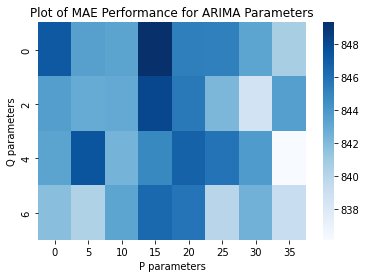

In [ ]:
#Visualize the performance of MAE for each parameter in a grid

sns.heatmap(mae_df,cmap="Blues")
plt.xlabel("P parameters")
plt.ylabel("Q parameters")
plt.title("Plot of MAE Performance for ARIMA Parameters")
plt.show();

> *Low MAE and RMSE values are good indicators for model performance and hyperparameter suitability. While these are important components for consideration, it is important to note the time factor. Suitable models and parameters should be chosen based on these, especially the difference between the MAE or RMSE of the best performing parameter and the time difference.* 

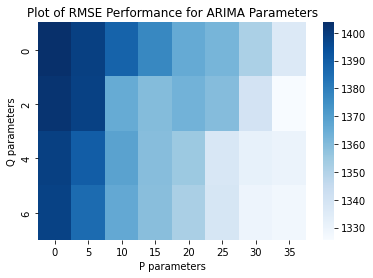

In [ ]:
#Visualize the performance of RMSE for each parameter in a grid
sns.heatmap(rmse_df,cmap="Blues")
plt.xlabel("P parameters")
plt.ylabel("Q parameters")
plt.title("Plot of RMSE Performance for ARIMA Parameters")
plt.show();

### **Visuaize Residuals [ARIMA]**

> The Residual plots show the difference between the real data and the predicted data. From the plots shown below, it is clear that there is very little difference between both data sets. 

In [ ]:
model_resid = model.resid

Text(0.5, 1.0, 'PACF PLOT FOR ARIMA MODEL')

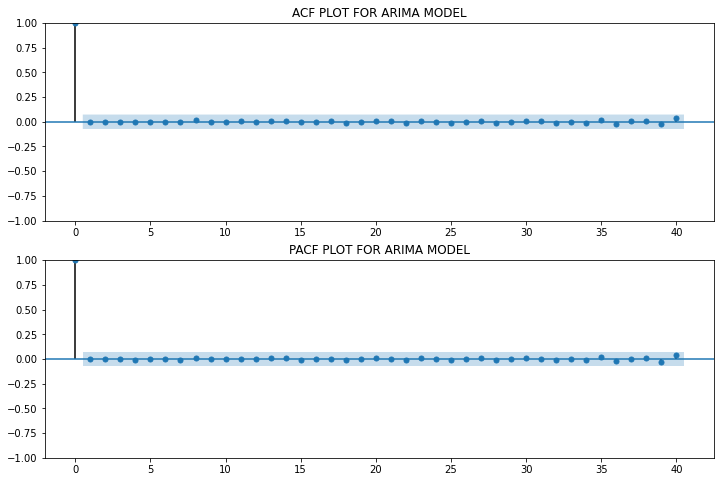

In [ ]:
#Visualize the ACF and PACF plots below
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model_resid, lags = 40, ax =ax1)
plt.title("ACF PLOT FOR ARIMA MODEL")
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model_resid, lags= 40, ax = ax2)
plt.title("PACF PLOT FOR ARIMA MODEL")

> The histogram plot below shows that the predicted values are not biased, and are equally distributed. The residual plot shows that the predicted data has no trend, and is good enough.

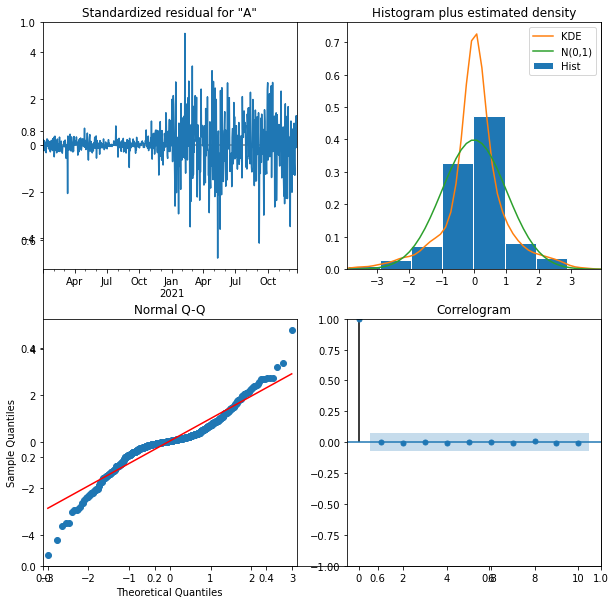

In [ ]:
#plot diagnostics of the trained model
fig, ax = plt.subplots(figsize=(10, 10))
model.plot_diagnostics(fig=fig);

### **AR model training and hyperparameter tuning**

> The AR model requires just the **p** parameter.

> Using the For loop, the value of the p was selected based on time complexity, as well as MAE and RMSE values.

In [ ]:
#create iterable containing the range of values for p parameters
p_params = range(1, 35)

#create list for MAEs and RMSEs
maes = []
rmse_ar = []

#use the for loop to iterate through the paarameters
for p in p_params:
    
    #to calculate the time elapsed for each parameter, start time
    start_time = time.time()
    #train AR model
    model3 = AutoReg(train, lags=p).fit()
    #calculate elapsed time
    elapsed_time = round(time.time()- start_time)
    #Print time elapsed to train model
    print(f"Trained AR model {p} in {elapsed_time}seconds")
    #predict based on training data
    y_pred = model3.predict()
    #calculate MAE of the trained model
    training_mae = mean_absolute_error(train.iloc[p:], y_pred.iloc[p:])
    #calculate RMSE of the trained model
    training_rmse = mean_squared_error(train.iloc[p:], y_pred.iloc[p:])
    #append training MAE and RMSE to the lists created
    maes.append(training_mae)
    rmse_ar.append(training_rmse)
#convert each list to a series    
mae_series = pd.Series(maes, name="mae", index=p_params)
rmse_series = pd.Series(rmse_ar, name="rmse", index=p_params)
mae_series.head(20)

Trained AR model 1 in 0seconds
Trained AR model 2 in 0seconds
Trained AR model 3 in 0seconds
Trained AR model 4 in 0seconds
Trained AR model 5 in 0seconds
Trained AR model 6 in 0seconds
Trained AR model 7 in 0seconds
Trained AR model 8 in 0seconds
Trained AR model 9 in 0seconds
Trained AR model 10 in 0seconds
Trained AR model 11 in 0seconds
Trained AR model 12 in 0seconds
Trained AR model 13 in 0seconds
Trained AR model 14 in 0seconds
Trained AR model 15 in 0seconds
Trained AR model 16 in 0seconds
Trained AR model 17 in 0seconds
Trained AR model 18 in 0seconds
Trained AR model 19 in 0seconds
Trained AR model 20 in 0seconds
Trained AR model 21 in 0seconds
Trained AR model 22 in 0seconds
Trained AR model 23 in 0seconds
Trained AR model 24 in 0seconds
Trained AR model 25 in 0seconds
Trained AR model 26 in 0seconds
Trained AR model 27 in 0seconds
Trained AR model 28 in 0seconds
Trained AR model 29 in 0seconds
Trained AR model 30 in 0seconds
Trained AR model 31 in 0seconds
Trained AR model 

1     841.570581
2     838.688048
3     839.531103
4     840.656675
5     840.934493
6     841.842916
7     840.337524
8     840.643222
9     841.421528
10    844.536864
11    847.367000
12    848.994339
13    853.577866
14    855.397082
15    855.755431
16    856.316605
17    856.707783
18    857.435107
19    858.110523
20    857.422482
Name: mae, dtype: float64

### **Parameter performance visualization [AR]**

> The performance of each parameter is visualized in grid format. The time complexity of each parameter is 0, hence the best model paramter is chosen based on its MAE and RMSE values 

In [ ]:
rmse_series

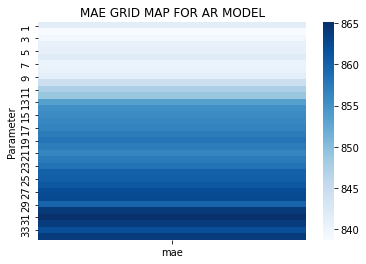

In [ ]:
#Visualize the performance of MAE for each parameter in a grid
sns.heatmap(mae_series.to_frame(),cmap="Blues")
plt.ylabel("Parameter")
plt.title("MAE GRID MAP FOR AR MODEL")
plt.show();

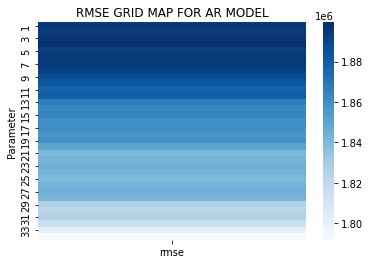

In [ ]:
#Visualize the performance of RMSE for each parameter in a grid
sns.heatmap(rmse_series.to_frame(),cmap="Blues")
plt.ylabel("Parameter")
plt.title("RMSE GRID MAP FOR AR MODEL")
plt.show();

### **Parameter performance visualization [AR]**

> With the aid of each of the ACF and PACF plots, It is possible to visualize the difference between the predicted data from the AR model and the real data from Yahoo finance.

In [ ]:
model_3_resid =model3.resid

Text(0.5, 1.0, 'PACF PLOT FOR AR MODEL')

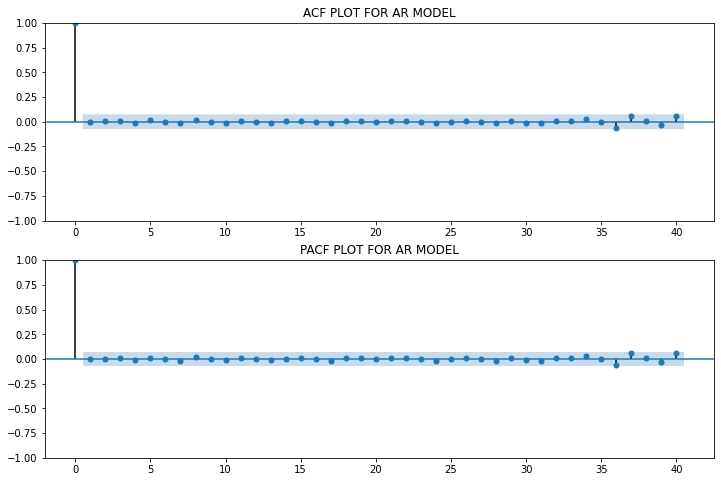

In [ ]:
#Visualize the ACF and PACF plots below
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model_3_resid, lags = 40, ax =ax1)
plt.title("ACF PLOT FOR AR MODEL")
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model_3_resid, lags= 40, ax = ax2)
plt.title("PACF PLOT FOR AR MODEL")

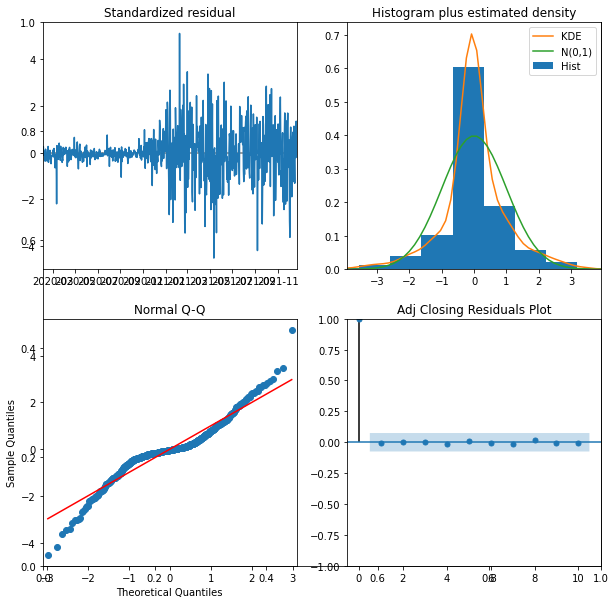

In [ ]:
#plot diagnostics of the trained AR model
fig, ax = plt.subplots(figsize=(10, 10))
model3.plot_diagnostics(fig=fig)
plt.title("Adj Closing Residuals Plot")
plt.show();

##  **Model Evaluation**

> At the selected model and parameter is trained with the test data. This shows the generalization of the model and its ability to conform to a dataset it hasn't been trained with. A good model should be generalizable.

> The walk forward or rolling window method was adopted in the forcasting of future values during the model evaluation stage.

In [ ]:
#create an empty series
pred_wfv = pd.Series()
history = train.copy()

In [ ]:
#create  for loop for the walk forward validation method
for i in range(len(test)):
  #generalize the selected model from the previous
  final_model = AutoReg(history, lags=1).fit()
  #predict the next value
  next_pred = final_model.forecast()
  #append the predicted value to the pred_wfv series
  pred_wfv = pred_wfv.append(next_pred)
  #append the predicted value to the test data by index value (rolling window)
  history = history.append(test[next_pred.index])

> 👇 calculate the performance criteria of the AR model on the test data 

In [ ]:
test_mae = mean_absolute_error(test, pred_wfv)
test_error = np.sqrt(mean_squared_error(test, pred_wfv))

print("Test MAE[WALK FORWARD VALIDATION]: ", round(test_mae, 2))
print("Test RMSE[WALK FORWARD VALIDATION]: ", round(test_error, 2))

Test MAE[WALK FORWARD VALIDATION]:  966.78
Test RMSE[WALK FORWARD VALIDATION]:  1347.56


In [ ]:
#check summary statistic of the final model
print(final_model.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                  902
Model:                     AutoReg(1)   Log Likelihood               -7786.932
Method:               Conditional MLE   S.D. of innovations           1371.425
Date:                Tue, 21 Jun 2022   AIC                          15579.865
Time:                        14:13:47   BIC                          15594.275
Sample:                    01-02-2020   HQIC                         15585.369
                         - 06-20-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          125.8076     89.842      1.400      0.161     -50.280     301.896
Adj Close.L1     0.9964      0.003    397.858      0.000       0.991       1.001
                                    Roots   

##  **Communicate Results**

In [ ]:
#create dataframe of predicted values 
df_pred = pd.DataFrame({"test": test, "pred_wfv": pred_wfv})
fig = px.line(df_pred, labels =  {"value": "Adj Closing"})
fig.show()

##  **Future Forecasts**

> In this section, I used the AutoRegression model to forecast the price of Bitcoin over the next 3 months

In [ ]:
#future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 8)]
future_dataset_series = final_model.predict(start=899, end = 1000, dynamic=True)
future_series = pd.concat([ts_btc, future_dataset_series])
future_series.tail()

2022-09-23    24797.176259
2022-09-24    24833.924326
2022-09-25    24870.540412
2022-09-26    24907.024990
2022-09-27    24943.378533
dtype: float64

In [ ]:
#create visuals for 3 month forecast
fig = px.line(future_series, labels =  {"value": "Adj Closing"})
fig.show()

**What about June?**

> The plot below, shows the expected trend for the remainder of June

In [ ]:
final_pred = final_model.predict(len(ts_btc), len(ts_btc)+8)
fig = px.line(final_pred, labels =  {"value": "Adj Closing"})
fig.show()